Get the data from https://tatoeba.org/en/downloads using the generator at the top of the page

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/var/folders/j4/zngd8xzn5bj14jfr2vyygwj40000gn/T/ipykernel_77874/675317603.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat((df, lang_df[['lang', 'token_ratio']]))


<Axes: title={'center': 'Token Ratio of Phi-3 Tokens to GPT tokens n=4323742'}, xlabel='Token Ratio (Phi-3-mini-128k-instruct:cl100k_base)', ylabel='Language'>

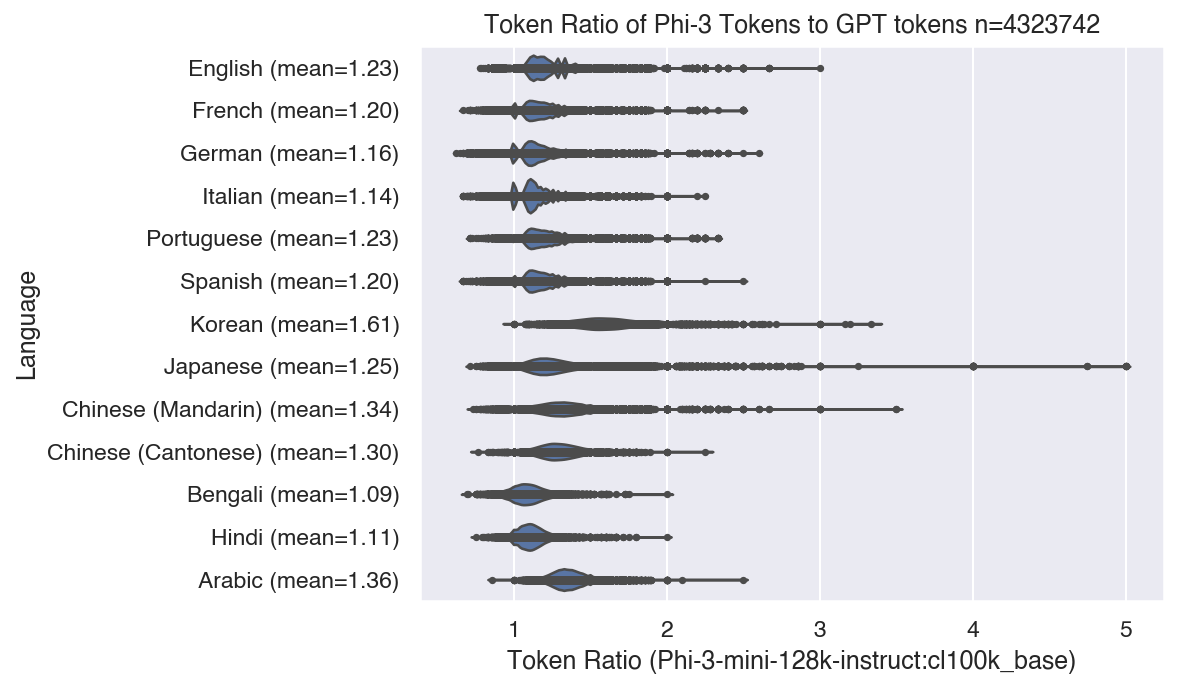

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tiktoken
from transformers import AutoTokenizer

gpt_enc = tiktoken.get_encoding("cl100k_base")
phi3_tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")


eng_df = pd.read_csv('data/eng_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'lang', 'text'], on_bad_lines='skip')
en_fr_df = pd.read_csv('data/en_fr_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_de_df = pd.read_csv('data/en_de_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_es_df = pd.read_csv('data/en_es_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_po_df = pd.read_csv('data/en_po_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_fr_df = pd.read_csv('data/en_fr_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_it_df = pd.read_csv('data/en_it_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_ben_df = pd.read_csv('data/en_ben_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_hi_df = pd.read_csv('data/en_hi_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_ja_df = pd.read_csv('data/en_ja_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_ko_df = pd.read_csv('data/en_ko_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_cn_man_df = pd.read_csv('data/en_cn-man_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_cn_can_df = pd.read_csv('data/en_cn-can_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
en_ar_df = pd.read_csv('data/en_ar_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
# en_am_df = pd.read_csv('data/en_am_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
# en_ha_df = pd.read_csv('data/en_ha_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
# en_sw_df = pd.read_csv('data/en_sw_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')
# en_zu_df = pd.read_csv('data/en_zu_sentences.tsv', sep='\t', header=None, names=['eng_idx', 'eng_text', 'tar_idx', 'text'], on_bad_lines='skip')

df = pd.DataFrame(columns=['lang', 'token_ratio'])

for lang, lang_df in zip(
        ['English', 'French', 'German', 'Italian', 'Portuguese', 'Spanish', 'Korean', 'Japanese', 'Chinese (Mandarin)', 'Chinese (Cantonese)', 'Bengali', 'Hindi', 'Arabic'], 
        [eng_df, en_fr_df, en_de_df, en_it_df, en_po_df, en_es_df, en_ko_df, en_ja_df, en_cn_man_df, en_cn_can_df, en_ben_df, en_hi_df, en_ar_df]
    ):
    lang_df.dropna(inplace=True)
    lang_df['phi3_sentence_token_length'] = lang_df['text'].apply(lambda x: len(phi3_tokenizer.encode(x)))
    lang_df['gpt_sentence_token_length'] = lang_df['text'].apply(lambda x: len(gpt_enc.encode(x)))

    lang_df['token_ratio'] = lang_df['phi3_sentence_token_length'] / lang_df['gpt_sentence_token_length']
    mean = lang_df['token_ratio'].mean()
    lang_df['lang'] = f"{lang} (mean={mean:.2f})"
    df = pd.concat((df, lang_df[['lang', 'token_ratio']]))

plt.rcParams.update({"figure.dpi": 150})
fig = sns.violinplot(data=df, x="token_ratio", y="lang", inner="point")

sns.set_theme(font="Helvetica")
fig.set_title(f'Token Ratio of Phi-3 Tokens to GPT tokens n={len(df)}')
fig.set(xlabel='Token Ratio (Phi-3-mini-128k-instruct:cl100k_base)', ylabel='Language')

fig

In [4]:
# Get the top 5 rows with the smallest token_ration in en_ja_df
en_ja_df.sort_values('token_ratio').head(5)

,eng_idx,eng_text,tar_idx,text,phi3_sentence_token_length,gpt_sentence_token_length,token_ratio,lang
224499,661562,"One hundred, two hundred, three hundred, four ...",10079894,百、二百、三百、四百、五百、六百、七百、八百、九百、千。,30,42,0.714286,Japanese (mean=1.25)
2714,17242,Your study will bear fruit.,178390,君の研究は実を結ぶだろう。,15,20,0.750000,Japanese (mean=1.25)
229321,10208930,The train departed Kobe station.,77483,列車は神戸駅を出た。,12,16,0.750000,Japanese (mean=1.25)
100184,278213,Birds fly.,125778,鳥は飛ぶ。,7,9,0.777778,Japanese (mean=1.25)
238377,10650497,The planes flew over the island.,85617,飛行機は島の上を飛んだ。,14,18,0.777778,Japanese (mean=1.25)
